<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-necessary-python-modules-and-defining-functions" data-toc-modified-id="Importing-necessary-python-modules-and-defining-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing necessary python modules and defining functions</a></span></li><li><span><a href="#Validation-dataset" data-toc-modified-id="Validation-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Validation dataset</a></span><ul class="toc-item"><li><span><a href="#Obtaining-metadata" data-toc-modified-id="Obtaining-metadata-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Obtaining metadata</a></span></li><li><span><a href="#Loading-methylation-$\beta$-values" data-toc-modified-id="Loading-methylation-$\beta$-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Loading methylation $\beta$-values</a></span></li><li><span><a href="#Putting-it-together" data-toc-modified-id="Putting-it-together-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Putting it together</a></span></li><li><span><a href="#Checking-basic-distributions-for-problematic-data" data-toc-modified-id="Checking-basic-distributions-for-problematic-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Checking basic distributions for problematic data</a></span></li><li><span><a href="#Saving-datatable" data-toc-modified-id="Saving-datatable-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Saving datatable</a></span></li></ul></li><li><span><a href="#Additional-dataset-#1" data-toc-modified-id="Additional-dataset-#1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Additional dataset #1</a></span><ul class="toc-item"><li><span><a href="#Obtaining-metadata" data-toc-modified-id="Obtaining-metadata-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Obtaining metadata</a></span></li><li><span><a href="#Loading-methylation-$\beta$-values" data-toc-modified-id="Loading-methylation-$\beta$-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Loading methylation $\beta$-values</a></span></li><li><span><a href="#Putting-it-together" data-toc-modified-id="Putting-it-together-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Putting it together</a></span></li><li><span><a href="#Checking-basic-distributions-for-problematic-data" data-toc-modified-id="Checking-basic-distributions-for-problematic-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Checking basic distributions for problematic data</a></span></li><li><span><a href="#Saving-datatable" data-toc-modified-id="Saving-datatable-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Saving datatable</a></span></li></ul></li><li><span><a href="#Additional-dataset-#2" data-toc-modified-id="Additional-dataset-#2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Additional dataset #2</a></span><ul class="toc-item"><li><span><a href="#Obtaining-metadata" data-toc-modified-id="Obtaining-metadata-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Obtaining metadata</a></span></li><li><span><a href="#Loading-methylation-$\beta$-values" data-toc-modified-id="Loading-methylation-$\beta$-values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Loading methylation $\beta$-values</a></span></li><li><span><a href="#Putting-it-together" data-toc-modified-id="Putting-it-together-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Putting it together</a></span></li><li><span><a href="#Checking-basic-distributions-for-problematic-data" data-toc-modified-id="Checking-basic-distributions-for-problematic-data-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Checking basic distributions for problematic data</a></span></li><li><span><a href="#Saving-datatable" data-toc-modified-id="Saving-datatable-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Saving datatable</a></span></li></ul></li></ul></div>

---
---

# Preparing additional datasets

## Importing necessary python modules and defining functions

The same functions were used for data preprocessing as in the case of the original dataset.

In [1]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# defining function to look into specific lines of a file
def head(filename, minrow = 0, maxrow=10):
    if ".gz" in filename:
        with gzip.open(filename, 'r') as f:
            lines = [f.readline().decode("utf-8") for line in range(1, maxrow+1)]
    else:
        with open(filename, 'r') as f:
            lines = [f.readline() for line in range(1, maxrow+1)]
    return lines[minrow:]
        
# defining function to search for specific strings in a file
def grep(filename, strings = []):
    if ".gz" in filename:
        with gzip.open(filename, 'r') as f:
            lines = []
            for l in f.readlines():
                if len(strings) == 0 or sum([s in l.decode("utf-8") for s in strings]) == len(strings):
                    lines.append(l.decode("utf-8"))
    else:
        with open(filename, 'r') as f:
            lines = []
            for l in f.readlines():
                if len(strings) == 0 or sum([s in l for s in strings]) == len(strings):
                    lines.append(l)
    return lines

## Validation dataset

The validation dataset used in our pipeline is downloaded from GEO under the accession number GSE19711. According to the [GEO overview site of the study](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi), it contains methylation data obtained from the same 27k Illumina platform as our original dataset for the whole blood samples of 274 healthy patients and an additional 266 women diagnosed with ovarian cancer:

> The Illumina Infinium 27k Human DNA methylation Beadchip v1.2 was used to obtain DNA methylation profiles across approximately 27,000 CpGs in whole blood samples from 540 samples, of which 266 were samples taken from postmenopausal women with ovarian cancer and 274 were from age-matched healthy controls.

In the validation cohort, both diseased and healthy donors will be included. This decision is based on the observation of [Horvath (2013) Additional file 2](https://static-content.springer.com/esm/art%3A10.1186%2Fgb-2013-14-10-r115/MediaObjects/13059_2013_3156_MOESM2_ESM.docx) that the disease status did not seem to influence DNAm age in this cohort.

The series matrix file was downloaded from:

```https://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19711/matrix/GSE19711_series_matrix.txt.gz```

In [3]:
head("GSE19711_series_matrix.txt.gz")

['!Series_title\t"Genome wide DNA methylation profiling of United Kingdom Ovarian Cancer Population Study (UKOPS)"\n',
 '!Series_geo_accession\t"GSE19711"\n',
 '!Series_status\t"Public on Mar 01 2010"\n',
 '!Series_submission_date\t"Dec 31 2009"\n',
 '!Series_last_update_date\t"Jan 02 2015"\n',
 '!Series_pubmed_id\t"20219944"\n',
 '!Series_summary\t"The Illumina Infinium 27k Human DNA methylation Beadchip v1.2 was used to obtain DNA methylation profiles across approximately 27,000 CpGs in whole blood samples from 540 samples, of which 266 were samples taken from postmenopausal women with ovarian cancer and 274 were from age-matched healthy controls"\n',
 '!Series_summary\t""\n',
 '!Series_summary\t"Keywords: DNA methylation"\n',
 '!Series_overall_design\t"Bisulphite converted DNA from the 540 samples were hybridised to the Illumina Infinium 27k Human Methylation Beadchip v1.2"\n']

### Obtaining metadata

In [4]:
GEO_ids = grep("GSE19711_series_matrix.txt.gz", strings=["!Sample_geo_accession"])[0].replace('"', '').strip().split("\t")[1:]

age_base = grep("GSE19711_series_matrix.txt.gz", strings=["ageatrecruitment"])[0].replace('"', '').strip().split("\t")[1:]
age = [int(a.split(": ")[1]) for a in age_base]

gender = ["female"]*len(age) # all patients are females

### Loading methylation $\beta$-values

In [5]:
methylation_data = pd.read_csv("GSE19711_series_matrix.txt.gz", sep="\t", comment="!")

### Putting it together

In [6]:
# setting the index to be probe IDs
methylation_data.index = methylation_data["ID_REF"]
# dropping the probe ID column as it's already present as the index
methylation_data = methylation_data[methylation_data.columns[1:]]

# transposing the dataframe, so each row now corresponds with a sample and each column with a probe
# with measurement beta-values in each cell
methylation_data = methylation_data.transpose()

# adding the chronological age as an additional column
methylation_data["age"] = [age[GEO_ids.index(k)] for k in methylation_data.index]

# adding gender as an additional column
methylation_data["gender"] = [gender[GEO_ids.index(k)] for k in methylation_data.index]

### Checking basic distributions for problematic data

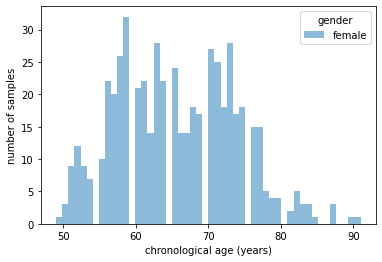

In [7]:
methylation_data.pivot(columns="gender", values="age").plot.hist(bins=50, alpha=0.5)
plt.xlabel("chronological age (years)")
plt.ylabel("number of samples");

The age distribution is in line with the fact that samples were collected from post-menopausal women.

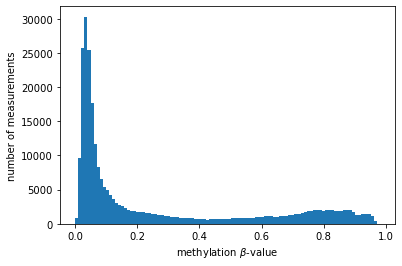

In [8]:
probe_columns = [c for c in methylation_data.columns if c[:2]=="cg"]
N = 500
plt.hist(np.array(methylation_data[np.random.choice(probe_columns, size=N, 
                                                    replace=False)]).reshape(methylation_data.shape[0]*N), 
         bins=100);
plt.xlabel(r'methylation $\beta$-value')
plt.ylabel("number of measurements");

There are no strange effects in the $\beta$-value distribution either.

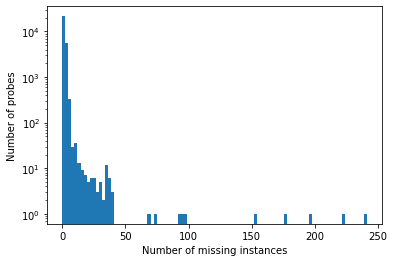

In [9]:
plt.hist(methylation_data[probe_columns].isnull().sum(axis=0), bins=100)
plt.xlabel("Number of missing instances")
plt.ylabel("Number of probes")
# using logarithmic y-axis to get a more easily interpretable figure
plt.yscale("log");

In [10]:
# number of probes with more than 10 missing values
(methylation_data[probe_columns].isnull().sum(axis=0) > 10).sum()

114

There aren't very many probes with extreme number of missing values.

### Saving datatable

In [11]:
methylation_data.to_csv("validation_dataset.csv")

## Additional dataset #1

The first additional dataset we use for the extended model is downloaded from GEO under the accession number GSE20067. According to the [GEO overview site of the study](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi), samples were processed with the 27k Illumina beadchip array and were obtained from diabetes patients with or without renal disease.

> The Illumina Infinium 27k Human DNA methylation Beadchip v1.2 was used to obtain DNA methylation profiles across approximately 27,000 CpGs in whole blood samples from a case-control study of 192 Irish patients with type 1 diabetes mellitus (T1D). Cases had T1D and nephropathy whereas controls had T1D but no evidence of renal disease.

We include both patients with nephropathy and healthy donors in the dataset. This is based on the observation of [Horvath (2013) Additional file 2](https://static-content.springer.com/esm/art%3A10.1186%2Fgb-2013-14-10-r115/MediaObjects/13059_2013_3156_MOESM2_ESM.docx) that the disease status did not seem to influence DNAm age in this cohort.

The series matrix file was downloaded from:

```https://ftp.ncbi.nlm.nih.gov/geo/series/GSE20nnn/GSE20067/matrix/GSE20067_series_matrix.txt.gz```

In [12]:
head("GSE20067_series_matrix.txt.gz")

['!Series_title\t"Genome wide DNA methylation profiling of diabetic nephropathy in type 1 diabetes mellitus"\n',
 '!Series_geo_accession\t"GSE20067"\n',
 '!Series_status\t"Public on Mar 01 2010"\n',
 '!Series_submission_date\t"Jan 27 2010"\n',
 '!Series_last_update_date\t"Aug 28 2019"\n',
 '!Series_pubmed_id\t"20219944"\n',
 '!Series_pubmed_id\t"20687937"\n',
 '!Series_summary\t"The Illumina Infinium 27k Human DNA methylation Beadchip v1.2 was used to obtain DNA methylation profiles across approximately 27,000 CpGs in whole blood samples from a case-control study of 192 Irish patients with type 1 diabetes mellitus (T1D). Cases had T1D and nephropathy whereas controls had T1D but no evidence of renal disease."\n',
 '!Series_summary\t"emails: christopher.bell@cancer.ucl.ac.uk, a.teschendorff@ucl.ac.uk"\n',
 '!Series_summary\t""\n']

### Obtaining metadata

In [13]:
GEO_ids = grep("GSE20067_series_matrix.txt.gz", strings=["!Sample_geo_accession"])[0].replace('"', '').strip().split("\t")[1:]

age_base = grep("GSE20067_series_matrix.txt.gz", strings=["ageatdiagnosis"])[0].replace('"', '').strip().split("\t")[1:]
age = [int(a.split(": ")[1]) for a in age_base]

gender_base = grep("GSE20067_series_matrix.txt.gz", strings=["sex:"])[0].replace('"', '').strip().split("\t")[1:]
gender = [g.split(": ")[1] for g in gender_base]

### Loading methylation $\beta$-values

In [14]:
methylation_data = pd.read_csv("GSE20067_series_matrix.txt.gz", sep="\t", comment="!")

### Putting it together

In [15]:
# setting the index to be probe IDs
methylation_data.index = methylation_data["ID_REF"]
# dropping the probe ID column as it's already present as the index
methylation_data = methylation_data[methylation_data.columns[1:]]

# transposing the dataframe, so each row now corresponds with a sample and each column with a probe
# with measurement beta-values in each cell
methylation_data = methylation_data.transpose()

# adding the chronological age as an additional column
methylation_data["age"] = [age[GEO_ids.index(k)] for k in methylation_data.index]

# adding gender as an additional column
methylation_data["gender"] = [gender[GEO_ids.index(k)] for k in methylation_data.index]

### Checking basic distributions for problematic data

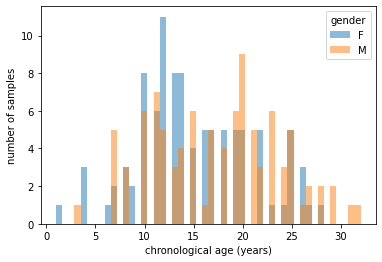

In [16]:
methylation_data.pivot(columns="gender", values="age").plot.hist(bins=50, alpha=0.5)
plt.xlabel("chronological age (years)")
plt.ylabel("number of samples");

This dataset contains samples from relatively young patients, but with a fairly homogeneous distribution of ages between different genders.

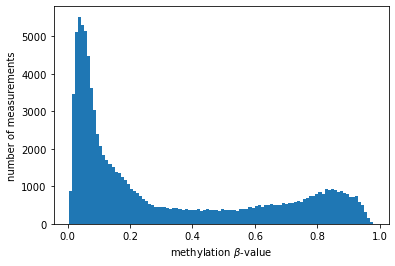

In [17]:
probe_columns = [c for c in methylation_data.columns if c[:2]=="cg"]
N = 500
plt.hist(np.array(methylation_data[np.random.choice(probe_columns, size=N, 
                                                    replace=False)]).reshape(methylation_data.shape[0]*N), 
         bins=100);
plt.xlabel(r'methylation $\beta$-value')
plt.ylabel("number of measurements");

There are no strange effects in the $\beta$-value distribution either.

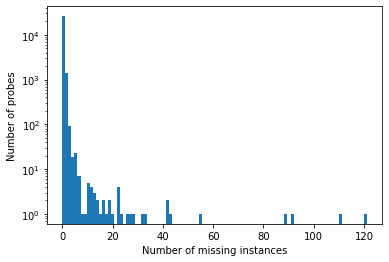

In [18]:
plt.hist(methylation_data[probe_columns].isnull().sum(axis=0), bins=100)
plt.xlabel("Number of missing instances")
plt.ylabel("Number of probes")
# using logarithmic y-axis to get a more easily interpretable figure
plt.yscale("log");

In [19]:
# number of probes with more than 10 missing values
(methylation_data[probe_columns].isnull().sum(axis=0) > 10).sum()

34

There aren't very many probes with extreme number of missing values.

### Saving datatable

In [20]:
methylation_data.to_csv("additional_dataset1.csv")

## Additional dataset #2

The second additional dataset we use for the extended model is downloaded from GEO under the accession number GSE20236. According to the [GEO overview site of the study](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi), whole blood samples were processed with the 27k Illumina beadchip array and were obtained from healthy female patients.

> We measured the methylation state of 27,578 CpG sites (Illumina HumanMethylation27 array) in whole blood samples from 93 heathy human females aged between 49 and 74, to discover sites which change methylation state with age.

The series matrix file was downloaded from:

```https://ftp.ncbi.nlm.nih.gov/geo/series/GSE20nnn/GSE20236/matrix/GSE20236_series_matrix.txt.gz```

In [21]:
head("GSE20236_series_matrix.txt.gz")

['!Series_title\t"Human Aging-associated DNA Hypermethylation Occurs Preferentially at Bivalent Chromatin Domains"\n',
 '!Series_geo_accession\t"GSE20236"\n',
 '!Series_status\t"Public on Feb 10 2010"\n',
 '!Series_submission_date\t"Feb 09 2010"\n',
 '!Series_last_update_date\t"Jan 02 2015"\n',
 '!Series_pubmed_id\t"20219945"\n',
 '!Series_summary\t"There is a growing realization that some aging-associated phenotypes/diseases have an epigenetic basis. Here we report the first genome-scale study of epigenomic dynamics during normal human aging. We identify aging-associated differentially methylated regions (aDMRs) in whole blood in a discovery cohort, and then replicate these aDMRs in sorted CD4+ T-cells and CD14+ monocytes in an independent cohort, suggesting that aDMRs occur in precursor haematopoietic cells. Further replication of the aDMRs in buccal cells, representing a tissue that originates from a different germ-layer compared with blood, demonstrates that the aDMR signature is a

### Obtaining metadata

In [22]:
GEO_ids = grep("GSE20236_series_matrix.txt.gz", strings=["!Sample_geo_accession"])[0].replace('"', '').strip().split("\t")[1:]

age_base = grep("GSE20236_series_matrix.txt.gz", strings=["age:"])[0].replace('"', '').strip().split("\t")[1:]
age = [float(a.split(": ")[1].split(" ")[0]) for a in age_base]

gender = ["female"]*len(age) # all patients are females

### Loading methylation $\beta$-values

In [23]:
methylation_data = pd.read_csv("GSE20236_series_matrix.txt.gz", sep="\t", comment="!")

### Putting it together

In [24]:
# setting the index to be probe IDs
methylation_data.index = methylation_data["ID_REF"]
# dropping the probe ID column as it's already present as the index
methylation_data = methylation_data[methylation_data.columns[1:]]

# transposing the dataframe, so each row now corresponds with a sample and each column with a probe
# with measurement beta-values in each cell
methylation_data = methylation_data.transpose()

# adding the chronological age as an additional column
methylation_data["age"] = [age[GEO_ids.index(k)] for k in methylation_data.index]

# adding gender as an additional column
methylation_data["gender"] = [gender[GEO_ids.index(k)] for k in methylation_data.index]

### Checking basic distributions for problematic data

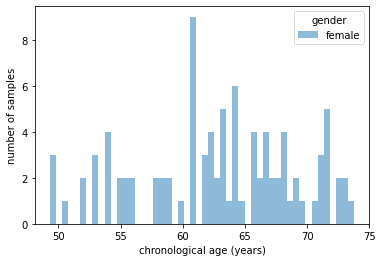

In [25]:
methylation_data.pivot(columns="gender", values="age").plot.hist(bins=50, alpha=0.5)
plt.xlabel("chronological age (years)")
plt.ylabel("number of samples");

This dataset contains samples from females aged between 49 and 74 years, this is in line with the age distribution above.

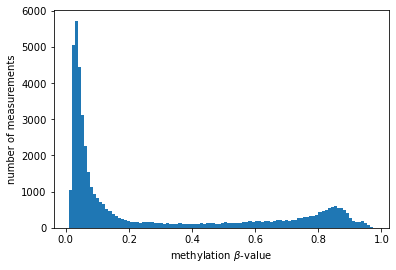

In [26]:
probe_columns = [c for c in methylation_data.columns if c[:2]=="cg"]
N = 500
plt.hist(np.array(methylation_data[np.random.choice(probe_columns, size=N, 
                                                    replace=False)]).reshape(methylation_data.shape[0]*N), 
         bins=100);
plt.xlabel(r'methylation $\beta$-value')
plt.ylabel("number of measurements");

There are no strange effects in the $\beta$-value distribution either.

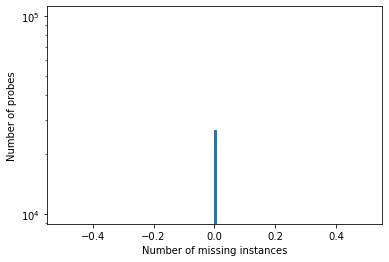

In [27]:
plt.hist(methylation_data[probe_columns].isnull().sum(axis=0), bins=100)
plt.xlabel("Number of missing instances")
plt.ylabel("Number of probes")
# using logarithmic y-axis to get a more easily interpretable figure
plt.yscale("log");

In [28]:
# number of probes with more than 10 missing values
(methylation_data[probe_columns].isnull().sum(axis=0) > 10).sum()

0

There aren't any probes with missing values.

### Saving datatable

In [29]:
methylation_data.to_csv("additional_dataset2.csv")